(-0.5, 499.5, 332.5, -0.5)

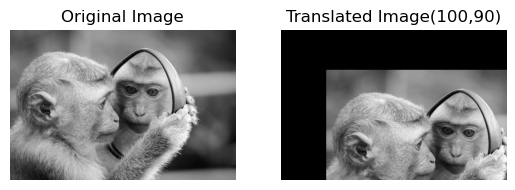

In [2]:
#translation
import cv2
import matplotlib.pyplot as plt
import numpy as np
img=cv2.imread(r"C:\Users\student\Pictures\cv\monkey.jpeg",0)
rows ,cols =img.shape
tx=100
ty=90
Mat=np.float64([[1,0,tx],[0,1,ty]])
trans_img=cv2.warpAffine(img,Mat,(cols,rows))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Translated Image(100,90)")
plt.imshow(trans_img,cmap='gray')
plt.axis("off")

(-0.5, 499.5, 332.5, -0.5)

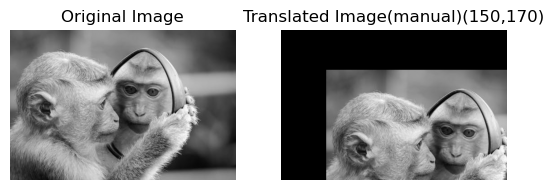

In [3]:
tx=150
ty=170
translate_img=np.zeros_like(img)

for x in range(rows):
    for y in range(cols):
        new_x=x+tx
        new_y=y+ty
        if 0<=new_x<cols & 0<=new_y<rows:
         translate_img[new_x,new_y]=img[tx,ty]

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Translated Image(manual)(150,170)")
plt.imshow(trans_img,cmap='gray')
plt.axis("off")        

(-0.5, 499.5, 332.5, -0.5)

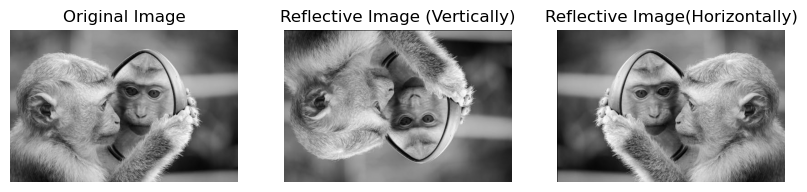

In [4]:
#reflection
Mat=np.float64([[1,0,0],[0,-1,rows]])
trans_img1=cv2.warpAffine(img,Mat,(cols,rows))

Mat=np.float64([[-1,0,cols],[0,1,0]])
trans_img2=cv2.warpAffine(img,Mat,(cols,rows))

plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Reflective Image (Vertically)")
plt.imshow(trans_img1,cmap='gray')
plt.axis("off")
plt.subplot(1,3,3)
plt.title("Reflective Image(Horizontally)")
plt.imshow(trans_img2,cmap='gray')
plt.axis("off")

(-0.5, 499.5, 332.5, -0.5)

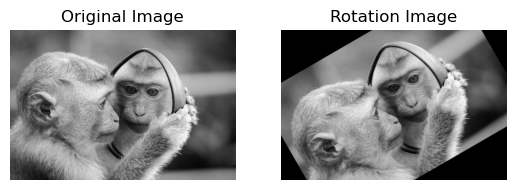

In [8]:
#Rotation
Mat=np.float32([[1,0,0],[0,-1,rows],[0,0,1]])
trans_img=cv2.warpAffine(img,cv2.getRotationMatrix2D((cols/2,rows/2),30,1),(cols,rows))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Rotation Image")
plt.imshow(trans_img,cmap='gray')
plt.axis("off")

(-0.5, 499.5, 332.5, -0.5)

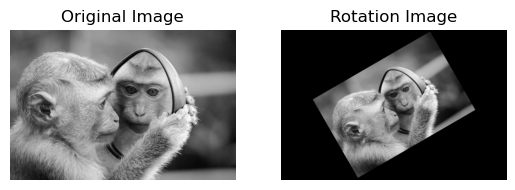

In [9]:
#Rotation
Mat=np.float32([[1,0,0],[0,-1,rows],[0,0,1]])
trans_img=cv2.warpAffine(img,cv2.getRotationMatrix2D((cols/2,rows/2),30,0.6),(cols,rows))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Rotation Image")
plt.imshow(trans_img,cmap='gray')
plt.axis("off")

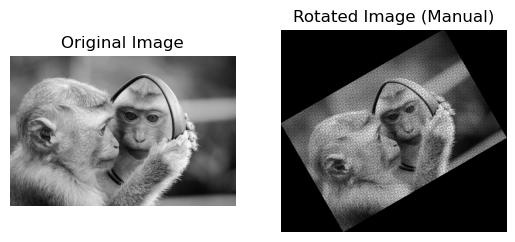

In [10]:
import math

rows, cols = img.shape
    
angle = 30
radians = np.deg2rad(angle) 
     
cos_theta = np.cos(radians)
sin_theta = np.sin(radians)
    
new_cols = int(cols * abs(cos_theta) + rows * abs(sin_theta))
new_rows = int(cols * abs(sin_theta) + rows * abs(cos_theta))
    
rotated_img = np.zeros((new_rows, new_cols), dtype=np.uint8)
    
center_x, center_y = cols // 2, rows // 2
new_center_x, new_center_y = new_cols // 2, new_rows // 2
    
for y in range(rows):
    for x in range(cols):
        new_x = int(cos_theta * (x - center_x) +sin_theta * (y - center_y) + new_center_x)
        new_y = int(-sin_theta * (x - center_x) + cos_theta * (y - center_y) + new_center_y)
        if 0 <= new_x < new_cols and 0 <= new_y < new_rows:
            rotated_img[new_y, new_x] = img[y, x]

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Rotated Image (Manual)")
plt.imshow(rotated_img, cmap="gray")
plt.axis('off')

plt.show()


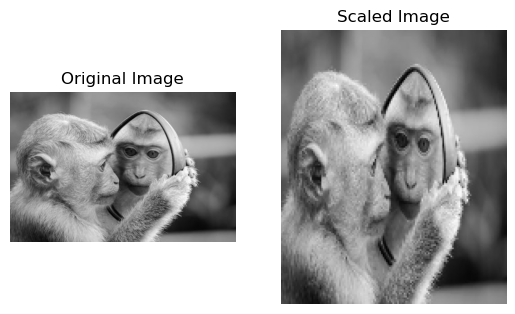

In [16]:
#scaling
scale_img=cv2.resize(img,(140,170))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Scaled Image")
plt.imshow(scale_img, cmap="gray")
plt.axis('off')

plt.show()

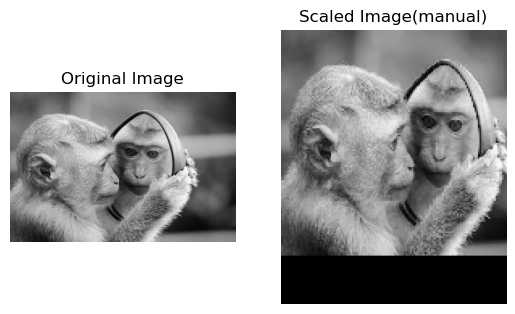

In [17]:
sx=170/cols
sy=140/rows

scale_img=np.zeros((170,140),dtype=np.uint8)

for i in range(170):
    for j in range(140):
        new_x=int(j/sx)
        new_y=int(i/sy)
        if 0 <= new_x < cols and 0 <= new_y < rows:
         scale_img[i,j]=img[new_y,new_x]

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Scaled Image(manual)")
plt.imshow(scale_img, cmap="gray")
plt.axis('off')

plt.show()

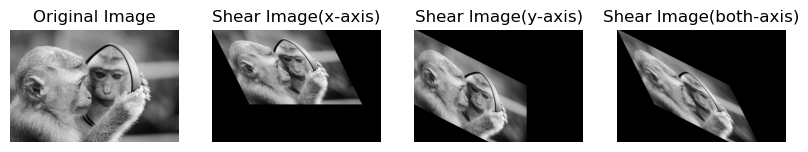

In [13]:
#shear
Mat=np.float32([[1,0.5,0],[0,1,0],[0,0,1]])
shear_img_x=cv2.warpPerspective(img,Mat,(int(cols*1.5),int(rows*1.5)))

Mat=np.float32([[1,0,0],[0.5,1,0],[0,0,1]])
shear_img_y=cv2.warpPerspective(img,Mat,(int(cols*1.5),int(rows*1.5)))

Mat=np.float32([[1,0.5,0],[0.5,1,0],[0,0,1]])
shear_img=cv2.warpPerspective(img,Mat,(int(cols*1.5),int(rows*1.5)))

plt.figure(figsize=(10,7))
plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Shear Image(x-axis)")
plt.imshow(shear_img_x, cmap="gray")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Shear Image(y-axis)")
plt.imshow(shear_img_y, cmap="gray")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Shear Image(both-axis)")
plt.imshow(shear_img, cmap="gray")
plt.axis('off')


plt.show()

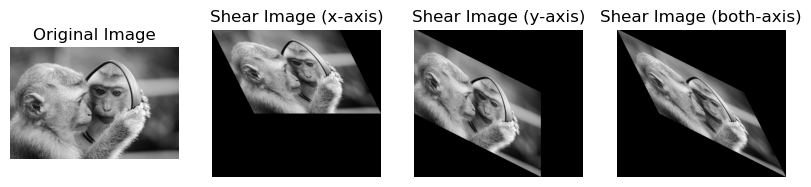

In [18]:
sx = 0.5 
sy = 0.5  

new_cols = int(cols + sx * rows)
new_rows = int(rows + sy * cols)


shear_img_x = np.zeros((new_rows, new_cols), dtype=np.uint8)
shear_img_y = np.zeros((new_rows, new_cols), dtype=np.uint8)
shear_img_both = np.zeros((new_rows, new_cols), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        new_x = int(j + sx * i)
        new_y = i
        if 0 <= new_x < new_cols and 0 <= new_y < new_rows:
            shear_img_x[new_y, new_x] = img[i, j]

for i in range(rows):
    for j in range(cols):
        new_x = j
        new_y = int(i + sy * j)
        if 0 <= new_x < new_cols and 0 <= new_y < new_rows:
            shear_img_y[new_y, new_x] = img[i, j]


for i in range(rows):
    for j in range(cols):
        new_x = int(j + sx * i)
        new_y = int(i + sy * j)
        if 0 <= new_x < new_cols and 0 <= new_y < new_rows:
            shear_img_both[new_y, new_x] = img[i, j]


plt.figure(figsize=(10,7))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Shear Image (x-axis)")
plt.imshow(shear_img_x, cmap="gray")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Shear Image (y-axis)")
plt.imshow(shear_img_y, cmap="gray")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Shear Image (both-axis)")
plt.imshow(shear_img_both, cmap="gray")
plt.axis('off')

plt.show()